# **Introduction to Modern Statistics**
## Chapter 1: Hello Data

### **Statistics is the study of how best to collect, analyze, and dran conclusions from data**

#### **Practical example of the use and importance of statistics**: 

An experiment is designed to study the effectiveness of stents in treating patients at risk of stroke
(Chimowitz et al., 2011). Stents are small mesh tubes that are placed inside narrow or weak arteries
to assist in patient recovery after cardiac events and reduce the risk of an additional heart attack or
death.

Many doctors have hoped that there would be similar benefits for patients at risk of stroke. We start
by writing the principal question the researchers hope to answer:

#### **Does the use of stents reduce the risk of stroke?**
The researchers who asked this question conducted an experiment with 451 at-risk patients. Each
volunteer patient was randomly assigned to one of two groups:
• Treatment group. Patients in the treatment group received a stent and medical management.
The medical management included medications, management of risk factors, and help in lifestyle
modification.
• Control group. Patients in the control group received the same medical management as the
treatment group, but they did not receive stents.
Researchers randomly assigned 224 patients to the treatment group and 227 to the control group. In
this study, the control group provides a reference point against which we can measure the medical
impact of stents in the treatment group.

Researchers studied the effect of stents at two time points: 30 days after enrollment and 365 days
after enrollment. The results of 5 patients are summarized in Table 1.1. Patient outcomes are
recorded as stroke or no event, representing whether or not the patient had a stroke during that
time period.

It would be difficult to answer a question on the impact of stents on the occurrence of strokes for
all of the study patients using these individual observations. This question is better addressed by
performing a statistical data analysis of all of the observations.


In [10]:
import pandas as pd
import numpy as np

In [4]:
stent30 = pd.read_csv("stent30.csv")
stent365 = pd.read_csv("stent365.csv")

In [8]:
print(f"stent30 dataset lenght: {len(stent30)}")
stent30.head()

stent30 dataset lenght: 451


,group,outcome
0,treatment,stroke
1,treatment,stroke
2,treatment,stroke
3,treatment,stroke
4,treatment,stroke


In [9]:
print(f"stent30 dataset lenght: {len(stent365)}")
stent365.head()

stent30 dataset lenght: 451


,group,outcome
0,treatment,stroke
1,treatment,stroke
2,treatment,stroke
3,treatment,stroke
4,treatment,stroke


In [49]:
df=stent30.groupby(["group","outcome"], as_index=False).value_counts()
df.rename(columns = {"count":"total"}, inplace=True)
df.groupby("group").total.sum()
df["total per group"] = df.group.map({"control":df[df.group == "control"].total.sum(),
                                      "treatment": df[df.group == "treatment"].total.sum()})
df

,group,outcome,total,total per group
0,control,no event,214,227
1,control,stroke,13,227
2,treatment,no event,191,224
3,treatment,stroke,33,224


In [50]:
groups={}
for cat in df.group:
    groups[cat] = df[df.group == cat].total.sum()
groups

{'control': 227, 'treatment': 224}

In [57]:
df["total con dictionary"] = df.group.map(groups)
df["percentages"] = round(100*df.total/df["total per group"],3)
df

,group,outcome,total,total per group,total con dictionary,percentages
0,control,no event,214,227,227,94.273
1,control,stroke,13,227,227,5.727
2,treatment,no event,191,224,224,85.268
3,treatment,stroke,33,224,224,14.732


In [58]:
df=stent365.groupby(["group","outcome"], as_index=False).value_counts()
df.rename(columns = {"count":"total"}, inplace=True)
df.groupby("group").total.sum()
df["total per group"] = df.group.map({"control":df[df.group == "control"].total.sum(),
                                      "treatment": df[df.group == "treatment"].total.sum()})

In [60]:
df["percentages"] = round(100*df.total/df["total per group"],3)
df

,group,outcome,total,total per group,percentages
0,control,no event,199,227,87.665
1,control,stroke,28,227,12.335
2,treatment,no event,179,224,79.911
3,treatment,stroke,45,224,20.089


These two summary statistics are useful in looking for differences in the groups, and we are in for a
surprise: an additional 8% of patients in the treatment group had a stroke! This is important for two
reasons. First, it is contrary to what doctors expected, which was that stents would reduce the rate
of strokes. Second, it leads to a statistical question: do the data show a “real” difference between the
groups?

This second question is subtle. Suppose you flip a coin 100 times. While the chance a coin lands
heads in any given coin flip is 50%, we probably won’t observe exactly 50 heads. This type of
variation is part of almost any type of data generating process. It is possible that the 8% difference
in the stent study is due to this natural variation. However, the larger the difference we observe (for
a particular sample size), the less believable it is that the difference is due to chance. So what we are
really asking is the following: if in fact stents have no effect, how likely is it that we observe such a
large difference?

While we don’t yet have statistical tools to fully address this question on our own, we can comprehend
the conclusions of the published analysis: there was compelling evidence of harm by stents in this
study of stroke patients.
Be careful: Do not generalize the results of this study to all patients and all stents. This study
looked at patients with very specific characteristics who volunteered to be a part of this study and
who may not be representative of all stroke patients. In addition, there are many types of stents
and this study only considered the self-expanding Wingspan stent (Boston Scientific). However, this
study does leave us with an important lesson: **we should keep our eyes open for surprises**.

#### **Data basics**

##### **Observations, variables and data matrices - datasets**

- The formal name of a row is a case or **observational unit**

- The formal name of a column is a **variable**

It is important to ask clarifying questions to ensure important aspects of the data are understood. **Its important that we know what each variable means and its units of measurement**

##### **Types of variables**

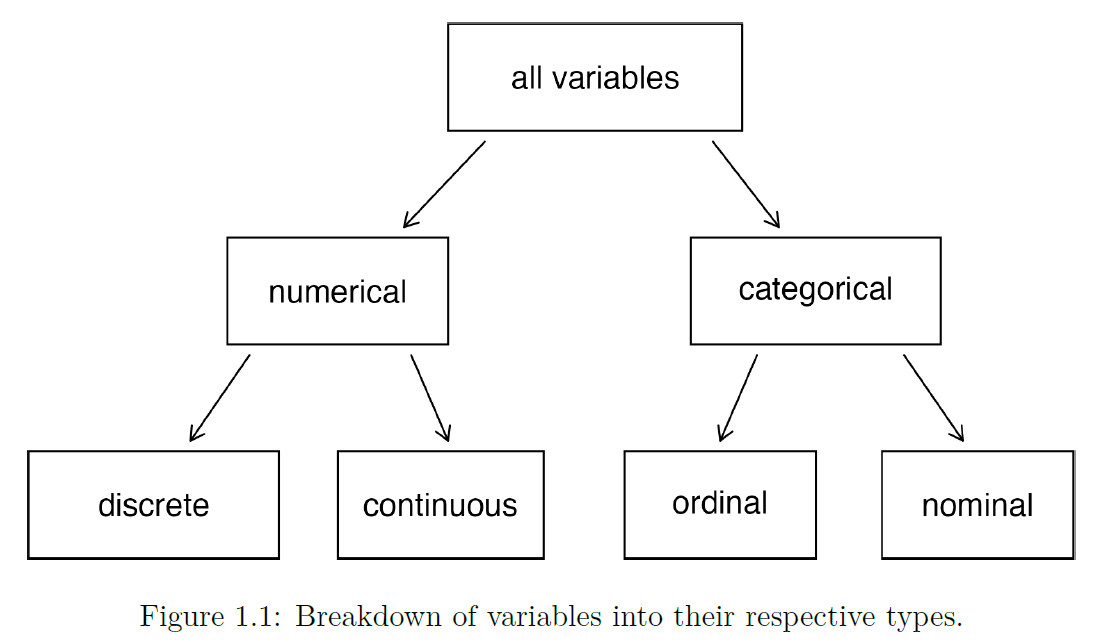

- #### **nominal** variables are those types of categories that doesn't have a natural order. Ex. States: [DC, Texas, etc]

- #### **ordinal** variables are those types of categories that has a natural order. Ex. Level of education: [primary school, some college, bachelors]

#### **Observational studies and experiments**

There are two primary types of data collection: **experiments** and **observational** studies.

- **Experiments**:

    Are used when we want to **evaluate the effect of particular traits, treatments, or conditions**.

    Researches identify a sample of individuals and split them into groups. The individuals in each group might be randomly assigned to a group - **randomized experiment** - making the groups roughly equal on all aspects, thus allowing us to control for any confounding variables that might affect the outcome. 

- **Observational**:

    Are used when we want to **form hypotheses** about why certain things happens. Researches merely observe the data that arise.
    
    Observational studies can provide evidence of a naturally occurring association between variables, but they cannot by themselfs show a casual connection as they don't offer a mechanism for controlling for confounding variables.


##### **ASSOCIATION != CAUSATION**

In general, association does not imply causation. **An advantage of a randomized experiment is that is easier to estabish causal relationships with such a study**. The main reason for this is that observational studies do not control for confounding variables, and hence establishing causal relationships with observational studies requires advanced statistical methods. 



